In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
wine = pd.read_csv("E:\DataScience\Assignments\PCA\wine.csv")

In [3]:
wine.describe()
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.data = wine.iloc[:,1:]
wine.data.head()

<ipython-input-4-f424d256a9e4>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
Wine = wine.data.values
Wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine_normal = scale(Wine)

In [7]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [9]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [10]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)

In [11]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [12]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [13]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

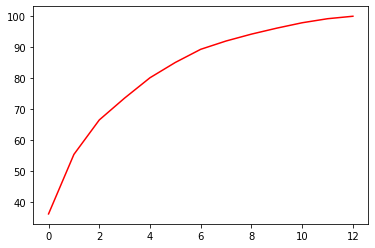

In [14]:
plt.plot(var1,color="red")

In [15]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

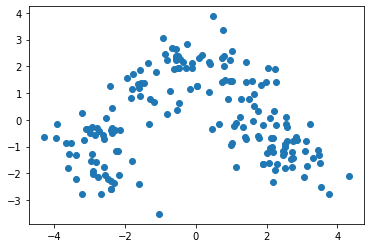

In [16]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [17]:
Df = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis=1)

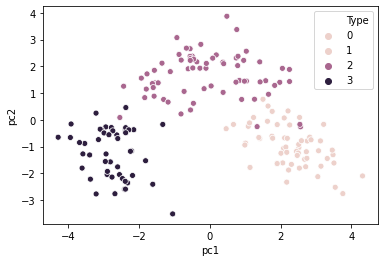

In [18]:
import seaborn as sns
sns.scatterplot(data=Df, x='pc1', y='pc2', hue='Type')

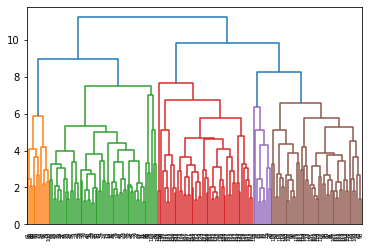

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(wine_normal, method='complete'))

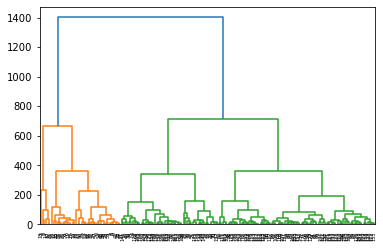

In [30]:
ndendrogram = sch.dendrogram(sch.linkage(wine, method='complete'))

In [20]:
from sklearn.cluster import AgglomerativeClustering
c = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [31]:
c = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'complete')

In [21]:
p_c = c.fit_predict(wine_normal)
clusters=pd.DataFrame(p_c,columns=['Clusters'])

In [32]:
pc = c.fit_predict(wine)
nclusters=pd.DataFrame(pc,columns=['Clusters'])

In [22]:
wine_normal = wine.iloc[:,1:]
wine_normal['c_clusterid'] = pd.Series(p_c)
wine_normal

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,c_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [34]:
wine = wine.iloc[:,1:]
wine['clusterid'] = pd.Series(pc)
wine

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,c_clusterid,clusterid
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,6
174,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,6
175,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,3
176,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,3


In [23]:
wine['c_clusterid'] = pd.Series(p_c)
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,c_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [24]:
clusters = wine.iloc[:,1:].groupby(wine.c_clusterid).mean()
clusters

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,c_clusterid
c_clusterid,,,,,,,,,,,,,,
0,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196,0.0
1,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632,1.0
2,12.210000,2.008750,2.291250,20.981250,88.375000,2.317292,2.175417,0.363542,1.662917,2.848125,1.038333,2.958333,479.083333,2.0
3,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000,3.0
4,13.400000,1.899000,2.814000,21.770000,120.100000,2.941000,3.129000,0.383000,1.751000,5.355000,1.152000,3.075000,1026.000000,4.0


In [35]:
nclusters = wine.iloc[:,1:].groupby(wine.clusterid).mean()
nclusters

,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,c_clusterid,clusterid
clusterid,,,,,,,,,,,,,
0,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333,1.000000,0.0
1,2.358545,21.161818,94.945455,1.870909,1.419273,0.407636,1.315455,4.943455,0.876727,2.262909,541.509091,1.109091,1.0
2,2.391667,16.504167,104.000000,2.813750,2.950417,0.287500,1.869583,5.304167,1.050000,3.174167,1094.166667,1.250000,2.0
3,2.434211,19.947368,112.578947,2.427895,2.138421,0.336842,1.743684,5.220000,0.948737,2.766316,893.842105,1.368421,3.0
4,2.241429,20.410714,90.321429,2.371071,2.177143,0.350357,1.607143,3.077857,1.024286,2.772143,376.321429,1.892857,4.0
5,2.521538,17.453846,104.230769,2.744615,2.917692,0.290769,1.809231,5.973077,1.108462,3.000000,1292.307692,1.692308,5.0
6,2.359394,19.245455,102.030303,2.132424,1.571515,0.408182,1.545758,5.901212,0.885152,2.330000,709.151515,0.939394,6.0


In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [26]:
cluster=KMeans(n_clusters=5)
cluster.fit(wine_normal)
cluster.labels_

array([0, 0, 0, 2, 4, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 4, 4, 4,
       0, 0, 4, 4, 0, 2, 4, 0, 2, 2, 0, 2, 0, 4, 4, 0, 0, 4, 4, 0, 0, 1,
       4, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 3, 1, 3, 1, 3, 3, 1,
       3, 3, 4, 1, 4, 3, 3, 0, 4, 3, 3, 3, 4, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 4, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 3, 1, 4, 4, 3, 1, 1, 1, 3, 3, 3, 1,
       1, 1, 3, 4, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 4, 1, 3, 3, 1, 4, 4, 4,
       4, 1])

In [38]:
nclusters=KMeans(n_clusters=7)
nclusters.fit(wine)
nclusters.labels_

array([5, 5, 1, 4, 2, 4, 1, 1, 5, 5, 4, 1, 1, 5, 4, 1, 1, 5, 4, 3, 3, 3,
       5, 5, 3, 3, 1, 1, 3, 5, 1, 4, 5, 1, 5, 3, 3, 5, 5, 3, 3, 5, 5, 2,
       3, 5, 5, 5, 5, 1, 5, 1, 1, 1, 5, 5, 5, 1, 1, 6, 2, 6, 2, 0, 0, 2,
       6, 6, 2, 2, 3, 0, 6, 5, 3, 0, 0, 6, 2, 6, 0, 2, 2, 6, 6, 6, 6, 6,
       2, 2, 6, 6, 6, 0, 0, 3, 2, 0, 2, 0, 2, 6, 0, 0, 2, 0, 6, 6, 0, 2,
       6, 0, 2, 0, 0, 0, 6, 0, 0, 6, 2, 6, 0, 0, 0, 0, 0, 6, 0, 6, 2, 6,
       6, 2, 2, 2, 2, 6, 6, 6, 2, 3, 6, 6, 3, 3, 0, 2, 2, 6, 6, 6, 0, 2,
       2, 2, 6, 3, 2, 2, 6, 2, 6, 2, 2, 6, 2, 2, 2, 2, 6, 6, 2, 2, 2, 3,
       3, 6])

In [59]:
c = list(range(1,7))
c
TWSS = []
for i in c:
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(wine)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(wine_normal.iloc[nclusters.labels_==j,:],Kmeans.cluster_centers_[j].reshape(1,wine.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    

In [68]:
c1 = list(range(2,9))
c1
TWSS1 = []
for i in c1:
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(wine)
    WSS1 = []
    for j in range(i):
        WSS.append(sum(cdist(wine.iloc[cluster.labels_==j,:],Kmeans.cluster_centers_[j].reshape(1,wine_normal.shape[1]),"euclidean")))
    TWSS1.append(sum(WSS))
    

In [61]:
TWSS

[array([23601.57338858]),
 array([57759.30725179]),
 array([87329.3757487]),
 array([115696.30307396]),
 array([132782.01896859]),
 array([186200.50973485])]

In [69]:
TWSS1

[array([1300458.44928017]),
 array([1356547.67406424]),
 array([1408499.88401513]),
 array([1465717.2807396]),
 array([1566757.16291417]),
 array([1678853.78630258]),
 array([1698537.38413883])]

([<matplotlib.axis.XTick at 0x1a43bea3af0>,
 <a list of 6 Text major ticklabel objects>)

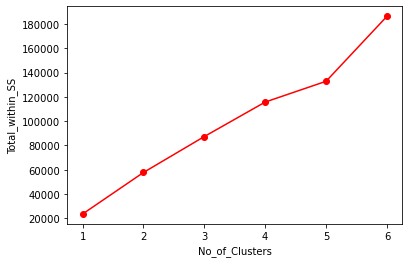

In [70]:
plt.plot(c,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("Total_within_SS");plt.xticks(c)


([<matplotlib.axis.XTick at 0x1a43bef8be0>,
 <a list of 7 Text major ticklabel objects>)

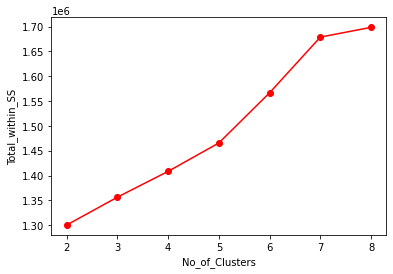

In [71]:
plt.plot(c1,TWSS1, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("Total_within_SS");plt.xticks(c1)
